In [25]:
import earthaccess
import xarray as xr
import hvplot.xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
import pandas as pd

In [26]:
auth = earthaccess.login(persist=True)

In [27]:
tspan = ("2024-03-01", "2025-03-31")
bbox = (113.338953078, -43.6345972634, 153.569469029, -10.6681857235)

In [28]:
results_land = earthaccess.search_data(
    short_name="PACE_OCI_L3M_LANDVI",
    temporal=tspan,
    bounding_box=bbox,
    granule_name="*.MO.*0p1deg*",  # Daily, 8-day or monthly: Day, 8D or MO | Resolution: 0p1deg or 0.4km
)

In [29]:
paths = earthaccess.open(results_land)
paths

QUEUEING TASKS | :   0%|          | 0/13 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/13 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/13 [00:00<?, ?it/s]

[<File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240301_20240331.L3m.MO.LANDVI.V3_0.0p1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240401_20240430.L3m.MO.LANDVI.V3_0.0p1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240501_20240531.L3m.MO.LANDVI.V3_0.0p1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240601_20240630.L3m.MO.LANDVI.V3_0.0p1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240701_20240731.L3m.MO.LANDVI.V3_0.0p1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240801_20240831.L3m.MO.LANDVI.V3_0.0p1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240901_20240930.L3m.MO.LANDVI.V3_0.0p1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20241001_20241031.L3m.MO.LANDVI.V3_0.0p1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20241101_20241130.L3m.M

In [30]:
dataset_land = xr.open_mfdataset(paths,
    combine="nested",
    concat_dim="date"
                                )

In [31]:
dataset_land["mari"] = dataset_land["mari"].clip(
    min=1.3,
    max=2.0
)
dataset_land["cire"] = dataset_land["cire"].clip(
    min=0.5,
    max=2.0
)
dataset_land["car"] = dataset_land["car"].clip(
    min=1.3,
    max=6.2
)

In [32]:
dataset_veg = dataset_land.drop_vars(
    ["palette", "ndvi", "evi", "ndwi", "ndii", "cci", "ndsi", "pri"]
)

In [33]:
dataset_v_norm = dataset_veg.astype(np.float64)
dataset_v_norm = (
    (dataset_veg - dataset_veg.min())
    / (dataset_veg.max() - dataset_veg.min())
)

In [34]:
dataset_land

<xarray.Dataset> Size: 3GB
Dimensions:  (date: 13, lat: 1800, lon: 3600, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 7kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 180.0
Dimensions without coordinates: date, rgb, eightbitcolor
Data variables:
    ndvi     (date, lat, lon) float32 337MB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    evi      (date, lat, lon) float32 337MB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndwi     (date, lat, lon) float32 337MB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndii     (date, lat, lon) float32 337MB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cci      (date, lat, lon) float32 337MB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndsi     (date, lat, lon) float32 337MB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    pri      (date, lat, lon) float32 337MB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cire     (date, lat, lon) float32 337MB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    car      (date, lat, lon) float32 337MB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    mari     (date, lat, lon) float32 337MB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    palette  (date, rgb, eightbitcolor) uint8 10kB dask.array<chunksize=(1, 3, 256), meta=np.ndarray>
Attributes: (12/62)
    product_name:                      PACE_OCI.20240301_20240331.L3m.MO.LAND...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3M/LANDVI/3.0
    data_bins:                         1714795
    data_minimum:                      -108.14531
    data_maximum:                      89.105576

In [35]:
data_land = dataset_v_norm.to_dataarray()

In [36]:
dataset_v_norm.to_dataarray()

<xarray.DataArray (variable: 3, date: 13, lat: 1800, lon: 3600)> Size: 1GB
dask.array<stack, shape=(3, 13, 1800, 3600), dtype=float32, chunksize=(1, 1, 512, 1024), chunktype=numpy.ndarray>
Coordinates:
  * lat       (lat) float32 7kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon       (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 180.0
  * variable  (variable) object 24B 'cire' 'car' 'mari'
Dimensions without coordinates: date

In [37]:
plant_pigments = data_land.sel(
variable = ['mari',  'cire', 'car']
)

In [38]:
num_dates = plant_pigments.sizes['date']
num_dates

13

In [39]:
min_lon, max_lat, max_lon, min_lat = bbox
australia = plant_pigments.sel(lat=slice(min_lat, max_lat), lon=slice(min_lon, max_lon))

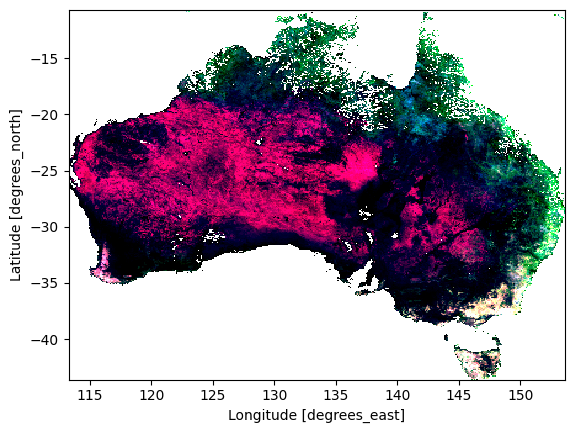

In [40]:
australia[:, 0].plot.imshow()

In [41]:
# # Determine the number of rows and columns
num_dates = australia.shape[1]
num_cols = 3
num_rows = math.ceil(num_dates / num_cols)
# # Create the subplots
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
# axes = axes.flatten()  # Flatten in case it's a 2D array
# # Plot each map
# for i in range(num_dates):
#     ax = axes[i]
#     map_australia = australia[:, i]
#     map_australia.plot.imshow(ax=ax)
#     ax.set_title(f"Month {i+1}")
# plt.tight_layout()
# plt.show()

In [42]:
australia.name = "pigment"
ds_australia = australia.to_dataset()

In [43]:
date_values = pd.date_range(start=tspan[0], periods=ds_australia.dims["date"], freq="M")
ds_australia = ds_australia.assign_coords(date=date_values)

In [44]:
# ds_australia.hvplot.rgb(x='lon', y='lat', bands='variable', data_aspect=1, flip_yaxis=True, xaxis=False, yaxis=None)
ds_australia.hvplot.rgb(
    x='lon', 
    y='lat', 
    bands='variable',
    groupby='date',
    data_aspect=1, 
    flip_yaxis=True,
    xaxis='bottom', 
    yaxis='left',
    rasterize=True,
    dynamic=True 
)

:DynamicMap   [date]
   :RGB   [lon,lat]   (R,G,B)

In [46]:
# # ANIMATION

# num_channels, num_dates, lat_dim, lon_dim = australia.shape

# assert num_channels == 3, "Expected 3 variables for RGB"

# # Normalize data to [0, 1] for imshow (if needed)
# def normalize_rgb(rgb_array):
#     """Normalize to [0, 1] per channel if values are not already in that range"""
#     rgb_norm = np.empty_like(rgb_array, dtype=np.float32)
#     for c in range(3):
#         channel = rgb_array[c]
#         min_val = np.nanmin(channel)
#         max_val = np.nanmax(channel)
#         rgb_norm[c] = (channel - min_val) / (max_val - min_val + 1e-8)
#     return rgb_norm

# # Create figure and axes
# fig, ax = plt.subplots(figsize=(8, 6))

# # Get first frame RGB image
# rgb0 = normalize_rgb(australia[:, 0, :, :])
# rgb0 = np.moveaxis(rgb0, 0, -1)  # (3, H, W) → (H, W, 3)

# im = ax.imshow(rgb0, animated=True)
# title = ax.set_title("Month 3")

# # Animation update function
# def update(frame):
#     rgb = normalize_rgb(australia[:, frame, :, :])
#     rgb = np.moveaxis(rgb, 0, -1)  # (3, H, W) → (H, W, 3)
#     im.set_data(rgb)
#     title.set_text(f"Month {frame + 3}")
#     return [im, title]

# ani = animation.FuncAnimation(fig, update, frames=num_dates, blit=True, interval=500)

# ani.save('australia_rgb_animation.gif', writer='pillow', fps=2)
# plt.show()


In [47]:
print('Done!')

Done!


In [54]:
dataset = xr.open_dataset(paths[0])
min_lon, max_lat, max_lon, min_lat = bbox
dataset = dataset.sel(lat=slice(min_lat, max_lat), lon=slice(min_lon, max_lon))
dataset["mari"] = dataset["mari"].clip(
    min=1.3,
    max=2.0
)
dataset["cire"] = dataset["cire"].clip(
    min=0.5,
    max=2.0
)
dataset["car"] = dataset["car"].clip(
    min=1.3,
    max=6.2
)
# array = dataset.drop_vars("palette").to_array("Product")
# array.attrs["long_name"] = "Vegetation Index"
# array.hvplot(
#     x="lon",
#     y="lat",
#     cmap="magma",
#     aspect=2,
#     title="July 2024 Monthly Average",
#     rasterize=True,
#     widget_location='top',
# )

dataset = dataset.drop_vars(
    ["palette", "ndvi", "evi", "ndwi", "ndii", "cci", "ndsi", "pri"]
)
dataset.sel(variable=['mari', 'car' ,'cire']).to_dataarray().plot.imshow()

KeyError: "'variable' is not a valid dimension or coordinate for Dataset with dimensions FrozenMappingWarningOnValuesAccess({'lat': 329, 'lon': 403})"

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
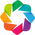

:DynamicMap   []
   :Overlay
      .Image.I :Image   [x,y]   (z)
      .HLine.I :HLine   [x,y]
      .VLine.I :VLine   [x,y]
      .Text.I  :Text   [x,y]

In [57]:

import holoviews as hv
from holoviews import streams

hv.extension('bokeh')
Y,X=(np.mgrid[0:100, 0:100]-50.)/20.
img = hv.Image(np.sin(X**2+Y**2))

# Declare pointer stream initializing at (0, 0) and linking to Image
pointer = streams.PointerXY(x=0, y=0, source=img)

# Define function to draw cross-hair and report value of image at location as text
def cross_hair_info(x, y):
    text = hv.Text(x+0.05, y, f'{img[x,y]:.3f}', halign='left', valign='bottom')
    return hv.HLine(y) * hv.VLine(x) * text

# Overlay image and cross_hair_info
img * hv.DynamicMap(cross_hair_info, streams=[pointer])